## K-means con scikit-learn

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


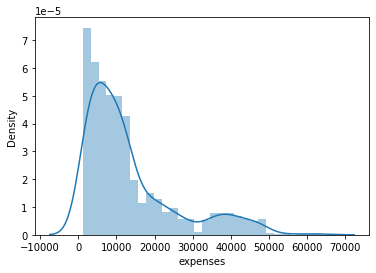

In [6]:
sns.distplot(df.expenses); #distplot dejara de funcionar en próximas versiones

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='expenses', ylabel='Density'>

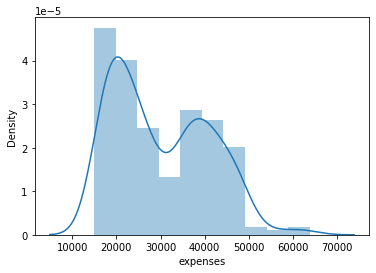

In [7]:
# Elimino aquellas polizas con menor gasto para enfocar mi estudio a los asegurados de mayor gasto
df.drop(df[df.expenses<15000].index, inplace=True)
sns.distplot(df.expenses)

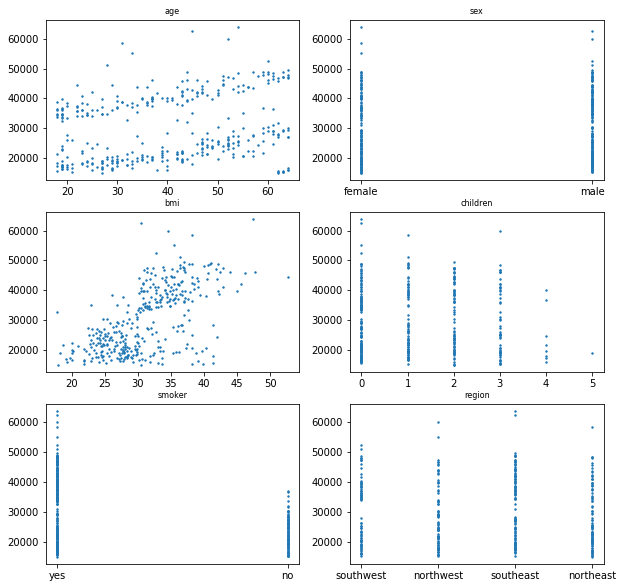

In [8]:
plt.figure(figsize=(10,10))
for index, columns in enumerate(df.columns[:6]):
    plt.subplot(321+index)
    plt.scatter(df[columns], df.expenses, s=2) 
    plt.title(columns, fontsize=8)
plt.show()

## Realizo un n cluster basado en edad y bmi

In [23]:
bmi = np.array(df.bmi.to_list())
expenses= np.array(df.expenses.to_list())
data = np.array([bmi,expenses]).T

In [27]:
n = 2 # número de grupos
k_means = KMeans(n_clusters=n)
modelo = k_means.fit(data)
centroides = modelo.cluster_centers_
etiquetas = modelo.labels_

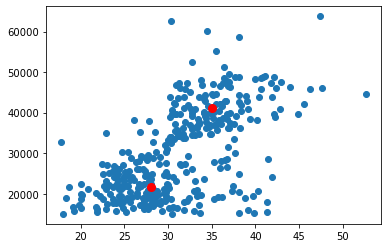

In [28]:
plt.scatter(bmi,expenses)
plt.plot(centroides[:,0],centroides[:,1],'ro',markersize=8)
plt.show()

## Estudio de cluster óptimo: Curva de Elbow

In [29]:
for i in range(1,8):
    k_means = KMeans(n_clusters=i)
    b = k_means.fit(data)
    print(i, b.score(data))

1 -42510357770.59266
2 -8844152628.909824
3 -5107357104.019064
4 -2869646579.221858
5 -1927718668.4367511
6 -1403676474.8941765
7 -946365405.6326574


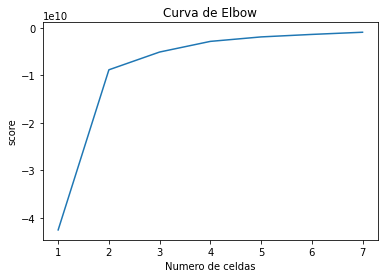

In [30]:
Nc = range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Numero de celdas')
plt.ylabel('score')
plt.title('Curva de Elbow')
plt.show()